In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load test module for sanity check
from test_utils import test

Data Generation
===

In [2]:
from numpy.random import rand, randn

In [3]:
n, d, k = 100, 2, 2

In [4]:
np.random.seed(20)
X = rand(n, d)

# means = [rand(d)  for _ in range(k)]  # works for any k
means = [rand(d) * 0.5 + 0.5, -rand(d) * 0.5 + 0.5]  # for better plotting when k = 2

S = np.diag(rand(d))

sigmas = [S] * k  # we'll use the same Sigma for all clusters for better visual results

print(means)
print(sigmas)

[array([0.69872366, 0.75176984]), array([0.25997411, 0.14504062])]
[array([[0.01764816, 0.        ],
       [0.        , 0.06360523]]), array([[0.01764816, 0.        ],
       [0.        , 0.06360523]])]


## Computing the probability density

In [38]:
mean = means[0]
sigma = sigmas[0]

one = (X - mean)
two = np.linalg.inv(sigma)
three = X - mean

one.shape, two.shape, three.shape

((100, 2), (2, 2), (100, 2))

In [49]:
np.argmax(one @ two @ three.T)

4646

In [43]:
X.shape

(100, 2)

In [67]:
np.linalg.inv(sigmas).shape

(2, 2, 2)

In [69]:
(X[:, None, :] - means).T.shape

(2, 2, 100)

In [78]:
a = (np.linalg.inv(sigmas)@(X[:, None, :] - means).T)
b = (X[:, None, :] - means)

In [75]:
(X[:, None, :] - means).shape

(100, 2, 2)

In [71]:
(X[:, None, :] - means) @ np.linalg.inv(sigmas)[None, :, :] @ (X[:, None, :] - means).T

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (100,2,2)->(100,newaxis,newaxis) (1,2,2,2)->(1,2,newaxis,newaxis)  and requested shape (2,2)

In [88]:
def compute_p(X, mean, sigma):
    """
    Implement
    """
    [n, d] = X.shape
    coeff = 1 / (2 * np.pi ** (d/2) * np.linalg.det(sigma) ** (1/2))
    exp_inside = (-1) / 2 * (X - mean) @ np.linalg.inv(sigma) @ (X - mean).T

    return np.argmax(coeff * np.exp(exp_inside))

test(compute_p)

Could not find any tests for compute_p


In [87]:
ps = [
    compute_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

2
2


In [35]:
assignments = np.argmax(ps, axis=0)
print(assignments)

1


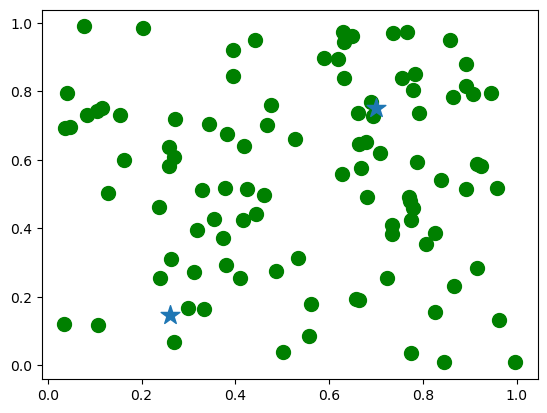

In [36]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()

## Computing the log-probability directly

**Why log?** - Our goal is to compare probabilities to see to which of the two stars a point belongs.

But the formula for the probability is a bit heavy, with multiplications and exponents.

By applying a log transform, we get additions and multiplications, which is easer to handle, and does not impact the comparison - if `a > b`, `log(a) > log(b)`.

(If it does not make sense - don't worry - you'll see this in the coming lectures)


In [80]:
def compute_log_p(X, mean, sigma):
    """
    Implement
    """
    coeff = 1 / (2 * np.pi ** (d/2) * np.linalg.det(sigma) ** (1/2))
    exp_inside = (-1) / 2 * (X - mean) @ np.linalg.inv(sigma) @ (X - mean).T

    return np.argmax(np.log(coeff) * exp_inside)

In [81]:
log_ps = [
    compute_log_p(X, m, s) for m, s in zip(means, sigmas)
]  # exercise: try to do this without looping

In [82]:
assignments = np.argmax(log_ps, axis=0)
print(assignments)

1


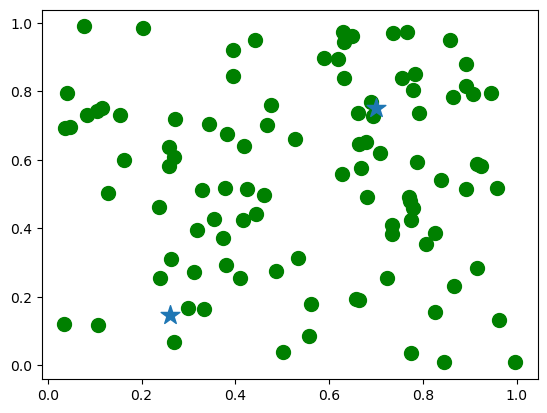

In [83]:
colors = np.array(["red", "green"])[assignments]
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100)
plt.scatter(np.array(means)[:, 0], np.array(means)[:, 1], marker="*", s=200)
plt.show()